In [1]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np
import time

from collections import defaultdict

# plt.ion()

In [6]:
# data = pd.read_json(r"E:\CancerDetection-project-1\DataSets\TCGA_mutationsOf_HTLV1.json")$
# data = pd.read_excel(r"/home/jasmeet/Documents/CancerDetection-project/DataSets/VIS-MCV (1).xlsx")$
# data = pd.read_json(r"E:\CancerDetection-project-1\DataSets\HPV mutation.json")$
# data = pd.read_json(r"E:\CancerDetection-project-1\DataSets\MCV Mutation.json")$
# data = pd.read_excel(r"E:\CancerDetection-project-1\DataSets\Mutations.xlsx")$
# data = pd.read_excel(r"E:\CancerDetection-project-1\DataSets\VIS-HBV.xlsx")$
# data = pd.read_excel(r"E:\CancerDetection-project-1\DataSets\VIS-HTLV-1.xlsx")$$
# data = pd.read_excel(r"E:\CancerDetection-project-1\DataSets\VIS-HPV.xlsx")$$
# data = pd.read_excel(r"E:\CancerDetection-project-1\DataSets\VIS-EBV.xlsx")$$
# data = pd.read_excel(r"E:\CancerDetection-project-1\DataSets\Mutation TCGA EBV.xlsx")$$
# data = pd.read_excel(r"D:\CancerDetection-project\DataSets\Coding and Noncoding mutations in T Cell Leukemia_Lymphoma related to HTLV1.xlsx")$$
# data = pd.read_excel(r"D:\CancerDetection-project\DataSets\VIS-HTLV-1(1).xlsx")$$
# data = pd.read_excel(r"/home/jasmeet/Documents/CancerDetection-project/DataSets/VIS-MCV(+50, -50).xlsx")$$
# data = pd.read_excel(r"/home/jasmeet/Documents/CancerDetection-project/DataSets/coordinates of hervs.xlsx")$$
# data1 = pd.read_excel("./aggregatevalues-breasttissue-BT474.xlsx", sheet_name="Sheet1")
# data2 = pd.read_excel("./aggregatevalues-breasttissue-MB435.xlsx", sheet_name="Sheet1")
# data3 = pd.read_excel("./aggregatevalues-breasttissue-MCF-7.xlsx", sheet_name="Sheet1")
# data4 = pd.read_excel("./aggregatevalues-breasttissue-T47D.xlsx", sheet_name="Sheet1")
data = pd.read_excel(r'D:\temp_files\cancer_gene_census (2).xlsx', sheet_name="Sheet1")
# updated datasets  
# data1 = pd.read_json(r"C:\Users\Master\Downloads\CancerDetection-project\Filtered-HERVs-analysis-new-datasets\T47D.json")$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\HTVL1 virus.json")$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\newDT\MCV Mutation(new).sonj")$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\newDT\HPV mutation(new).json")$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\newDT\MCV Mutation(new).json")$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\newDT\Mutations(new).json")$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\newDT\VIS-HBV(new).json")$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\new_Improved_DataSets\VIS-HTLV-1(new).json")$$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\new_Improved_DataSets\VIS-HPV(new).json")$$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\new_Improved_DataSets\VIS-EBV(new).json")$$
# data1 = pd.read_json(r"E:\CancerDetection-project-1\new_Improved_DataSets\Mutation TCGA EBV(new).json")$$
# data1 = pd.read_json(r"/home/jasmeet/Documents/CancerDetection-project/Filtered_DataSets/VIS-MCV(+50, -50)_new.json")$$
# data1 = pd.read_json(r"/home/jasmeet/Documents/CancerDetection-project/DataSets/MCV Mutation.json")$$

In [7]:
data

,A,B,C,Genome Location,D,E,F,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,APC,adenomatous polyposis of the colon gene,324,5:112737888-112846239,1,Yes,22.20,yes,yes,"colorectal, pancreatic, desmoid, hepatoblastom...",...,"E, M, O",Rec,TSG,"D, Mis, N, F, S",NaN,NaN,NaN,COSG208824,APC,"324,APC,DP2,DP2.5,DP3,ENSG00000134982.16,P2505..."
1,MET,met proto-oncogene (hepatocyte growth factor r...,4233,7:116672405-116796342,1,Yes,31.20,yes,NaN,"papillary renal, head-neck squamous cell",...,E,Dom,oncogene,Mis,NaN,NaN,NaN,COSG242559,MET,"4233,DFNB97,ENSG00000105976.14,HGFR,MET,P08581..."
2,FAT4,FAT atypical cadherin 4,79633,4:125316399-125492932,1,Yes,28.10,yes,NaN,"lymphoma, pancreatic, head and neck, melanoma,...",...,"E, L",NaN,TSG,"Mis, N",NaN,yes,Hennekam lymphangiectasia-lymphedema syndrome ...,COSG273977,FAT4,"79633,CDHF14,CDHR11,ENSG00000196159.11,FAT-J,F..."
3,TERT,telomerase reverse transcriptase,7015,5:1253167-1295047,1,Yes,15.33,yes,yes,"melanoma, glioblastoma, hepatocellular carcino...",...,"E, O",Dom,"oncogene, TSG",Promoter Mis,NaN,yes,"Dyskeratosis congenita, Telomere-related pulmo...",COSG329622,TERT,"7015,ENSG00000164362.18,EST2,O14746,TCS1,TERT,..."
4,ARID2,AT rich interactive domain 2,196528,12:45729665-45908040,1,Yes,12.00,yes,NaN,hepatocellular carcinoma,...,E,Rec,TSG,"N, S, F",NaN,NaN,NaN,COSG205476,ARID2,"196528,ARID2,BAF200,DKFZp686G052,ENSG000001890..."
5,AXIN1,axin 1,8312,16:287440-352659,1,Yes,13.30,yes,NaN,"colorectal, endometrial, prostate, hepatocellu...",...,"E, O",Rec,TSG,"D, Mis, N, F, S",NaN,NaN,NaN,COSG294712,AXIN1,"8312,AXIN1,ENSG00000103126.14,O15169,PPP1R49"
6,AXIN2,axin 2,8313,17:65528563-65561647,1,Yes,24.10,yes,yes,"colorectal carcinoma, stomach carcinoma, hepat...",...,E,Rec,TSG,"Mis, F, N",NaN,NaN,NaN,COSG310579,AXIN2,"8313,AXIN2,DKFZp781B0869,ENSG00000168646.12,MG..."
7,CASP8,"caspase 8, apoptosis-related cysteine peptidase",841,2:201258036-201287711,1,Yes,33.10,yes,NaN,"hepatocellular, oral squamous cell, breast",...,E,Rec,TSG,"N, S, F",NaN,NaN,NaN,COSG353681,CASP8,"841,CASP8,Casp-8,ENSG00000064012.21,FLICE,MACH..."
8,HNF1A,HNF1 homeobox A,6927,12:120978749-121001269,1,Yes,24.31,yes,yes,"hepatic adenoma, hepatocellular",...,E,Rec,TSG,"Mis, F",NaN,yes,"Maturity-onset diabetes of the young, TYPE III",COSG258866,HNF1A,"6927,ENSG00000135100.17,HNF1,HNF1A,LFB1,MODY3,..."
9,IL6ST,"interleukin 6 signal transducer (gp130, oncost...",3572,5:55935095-55994993,1,Yes,11.20,yes,NaN,hepatocellular carcinoma,...,E,Dom,oncogene,O,NaN,NaN,NaN,COSG264297,IL6ST,"3572,CD130,ENSG00000134352.19,GP130,IL6ST,P40189"


In [8]:
# data['Integration position in host genome']
data["Genome Location"]

0      5:112737888-112846239
1      7:116672405-116796342
2      4:125316399-125492932
3          5:1253167-1295047
4       12:45729665-45908040
5           16:287440-352659
6       17:65528563-65561647
7      2:201258036-201287711
8     12:120978749-121001269
9        5:55935095-55994993
10      18:47808957-47930559
11     6:156777374-157210779
12       3:41220551-41239888
13      19:14514770-14518420
14      19:14091688-14117744
15       4:86594315-86815171
Name: Genome Location, dtype: object

In [ ]:
chro = []
start = []
end = []

for i in data["Genome Location"]:
    chro.append(str(i).split(':')[0])
    start.append(str(i).split(':')[1].split('-')[0])
    end.append(str(i).split(':')[1].split('-')[1])

In [30]:
chro = []
loc = []
for i in data['Integration position in host genome']:
    chrom, loca = tuple(str(i).split(':'))
    chro.append(chrom)
    loc.append(int(loca))


In [31]:
df = pd.DataFrame({'chr': chro, 'start': start, 'stop': end})
df.to_excel('output1.xlsx', index=False)

In [23]:
for i, j in zip(chro, loc):
    print(f'{i}:{j}')  

chr5:88432442
chr5:88754909
chr5:1275390
chr5:173125603
chr6:68664024
chr8:39200450
chr4:79048012
chr3:24499331
chr7:52802419
chr3:121439129
chr5:1295172
chr7:70267023
chr5:1293404
chr5:1310429
chr17:15412626
chr20:30502092
chr9:24396870
chr4:151954261
chr1:173065047
chr1:47847259
chr11:83163665
chr9:43410389
chr8:9936640
chr10:85767043
chr15:31673527
chr3:39026094
chr11:64200314
chr1:26089496
chr4:35991775
chr7:74614231
chr5:1291059
chr17:21536937
chr18:56110442
chr4:190666407
chr10:114925588
chr7:74113982
chr2:86622425
chr7:6955583
chr6:67876043
chr10:109468840
chr1:63211678
chr3:1482111
chr3:1482107
chr17:47431923
chr10:120628434
chr5:1240477
chr3:113632087
chr9:139300273
chr4:74142783
chr15:60237451
chr15:85449263
chr2:116472918
chr3:182599673
chr1:154239263
chrY:28502748
chr9:34295985
chr4:103653592
chr4:155171488
chr5:1295758
chr1:7735733
chr7:57446860
chr12:5951302
chr9:136346366
chr9:139866006
chr9:139845988
chr8:30611415
chr8:30614167
chr14:76997666
chr16:89385728
chrY:1744216

In [10]:
dup_values = defaultdict(set)

In [4]:
def add_value(first, second):
    l = [data1['chrStart - chrEnd'], data2['chrStart - chrEnd'], data3['chrStart - chrEnd'], data4['chrStart - chrEnd']]
    l1 = ['BT474', 'MB435', 'MCF_7', 'T47D']
    value1 = (l[first], l[second])
    value2 = (l1[first], l1[second])
    for val in value1[0]:
        if value1[1].isin([val]).any():
            dup_values[val].add(f'{value2[0]}')
            dup_values[val].add(f'{value2[1]}')
        # print(f'{value2[0]}-{value2[1]}:', val)

    # dup_values

In [12]:
first = 4
second = 3
for i in range(-1, first):
    for j in range(second):
        add_value(first-1, j)
    first -= 1
    second -= 1

In [24]:
dup_values
dup_values_copy = dup_values.copy()
len(dup_values_copy)

20

In [22]:
data = pd.DataFrame(columns=['chrStart-chrEnd', 'Normal tissue', 'Cancer tissue BT474', 'Cancer tissue MB435', 'Cancer tissue MCF-7', 'Cancer tissue T47D'])

In [26]:
data

,chrStart-chrEnd,Normal tissue,Cancer tissue BT474,Cancer tissue MB435,Cancer tissue MCF-7,Cancer tissue T47D
0,chr2:100891187 - 100891303,0.305726,1.123714,NaN,1.980466,0.496019
1,chr2:100891443 - 100891481,0.288553,1.015568,NaN,1.755527,NaN
2,chr2:100891954 - 100891986,0.279159,0.984391,NaN,1.662895,NaN
3,chr2:100892143 - 100892175,0.262097,0.909515,NaN,1.500255,0.453194
4,chr2:100894160 - 100894192,0.237372,0.829317,NaN,1.311525,0.40214
5,chr2:100894802 - 100894834,0.223884,0.782839,NaN,1.224941,NaN
6,chr2:100895504 - 100895603,0.212817,0.694747,NaN,1.104228,NaN
7,chr2:100895632 - 100895677,0.208582,0.681413,NaN,1.086475,0.376827
8,chr2:100895794 - 100895863,0.196928,0.653008,NaN,1.013954,NaN
9,chr2:100896139 - 100896182,0.194083,0.639736,NaN,0.978567,NaN


In [25]:
#First
data_list1 = [data1.iterrows(), data2.iterrows(), data3.iterrows(), data4.iterrows()]
i = 0
aggr_normal = []
while i<=3:
    for index, values in data_list1[i]:
        if values[0] in dup_values_copy.keys():
            data = pd.concat([data, pd.DataFrame({'chrStart-chrEnd': [values[0]], 'Normal tissue': [np.nan], 'Cancer tissue BT474': [np.nan], 'Cancer tissue MB435': [np.nan], 'Cancer tissue MCF-7': [np.nan], 'Cancer tissue T47D': [np.nan]})], ignore_index=True)
            
            if 'BT474' in dup_values_copy[values[0]]:
                # print(data1.index[data1['ChrStart-chrEnd'] == values[0]].tolist())
                aggr_normal.append(data1.loc[data1.index[data1['chrStart - chrEnd'] == values[0]].tolist()[0]][1])
                data.at[data.index[data['chrStart-chrEnd'] == values[0]].tolist()[0], 'Cancer tissue BT474'] = data1.loc[data1.index[data1['chrStart - chrEnd'] == values[0]].tolist()[0]][2]
            
            if 'MB435' in dup_values_copy[values[0]]:
                # print(data2.index[data2['ChrStart-chrEnd'] == values[0]].tolist())
                aggr_normal.append(data2.loc[data2.index[data2['chrStart - chrEnd'] == values[0]].tolist()[0]][1])
                data.at[data.index[data['chrStart-chrEnd'] == values[0]].tolist()[0], 'Cancer tissue MB435'] = data2.loc[data2.index[data2['chrStart - chrEnd'] == values[0]].tolist()[0]][2]

            if 'MCF_7' in dup_values_copy[values[0]]:
                # print(data3.index[data3['ChrStart-chrEnd'] == values[0]].tolist())
                aggr_normal.append(data3.loc[data3.index[data3['chrStart - chrEnd'] == values[0]].tolist()[0]][1])
                data.at[data.index[data['chrStart-chrEnd'] == values[0]].tolist()[0], 'Cancer tissue MCF-7'] = data3.loc[data3.index[data3['chrStart - chrEnd'] == values[0]].tolist()[0]][2]

            if 'T47D' in dup_values_copy[values[0]]:
                # print(data4.index[data4['ChrStart-chrEnd'] == values[0]].tolist())
                aggr_normal.append(data4.loc[data4.index[data4['chrStart - chrEnd'] == values[0]].tolist()[0]][1])
                data.at[data.index[data['chrStart-chrEnd'] == values[0]].tolist()[0], 'Cancer tissue T47D'] = data4.loc[data4.index[data4['chrStart - chrEnd'] == values[0]].tolist()[0]][2]

            data.at[data.index[data['chrStart-chrEnd'] == values[0]].tolist()[0], 'Normal tissue'] = np.average(aggr_normal)
            del dup_values_copy[values[0]]
            aggr_normal.clear()
    i += 1

In [27]:
#Second
data_list = [data1.iterrows(), data2.iterrows(), data3.iterrows(), data4.iterrows()]
dt_num = 0
while dt_num<=3:
    for index_next, values_next in data_list[dt_num]:
        if data['chrStart-chrEnd'].isin([values_next[0]]).any():
            continue
        else:
            if dt_num == 0:
                data = pd.concat([data, pd.DataFrame({'chrStart-chrEnd': [values_next[0]], 'Normal tissue': [values_next[1]], 'Cancer tissue BT474': [values_next[2]], 'Cancer tissue MB435': [np.nan], 'Cancer tissue MCF-7': [np.nan], 'Cancer tissue T47D': [np.nan]})], ignore_index=True)
            elif dt_num == 1:
                data = pd.concat([data, pd.DataFrame({'chrStart-chrEnd': [values_next[0]], 'Normal tissue': [values_next[1]], 'Cancer tissue BT474': [np.nan], 'Cancer tissue MB435': [values_next[2]], 'Cancer tissue MCF-7': [np.nan], 'Cancer tissue T47D': [np.nan]})], ignore_index=True)
            elif dt_num == 2:
                data = pd.concat([data, pd.DataFrame({'chrStart-chrEnd': [values_next[0]], 'Normal tissue': [values_next[1]], 'Cancer tissue BT474': [np.nan], 'Cancer tissue MB435': [np.nan], 'Cancer tissue MCF-7': [values_next[2]], 'Cancer tissue T47D': [np.nan]})], ignore_index=True)
            elif dt_num == 3:
                data = pd.concat([data, pd.DataFrame({'chrStart-chrEnd': [values_next[0]], 'Normal tissue': [values_next[1]], 'Cancer tissue BT474': [np.nan], 'Cancer tissue MB435': [np.nan], 'Cancer tissue MCF-7': [np.nan], 'Cancer tissue T47D': [values_next[2]]})], ignore_index=True)
    dt_num += 1

In [28]:
data

,chrStart-chrEnd,Normal tissue,Cancer tissue BT474,Cancer tissue MB435,Cancer tissue MCF-7,Cancer tissue T47D
0,chr2:100891187 - 100891303,0.305726,1.123714,NaN,1.980466,0.496019
1,chr2:100891443 - 100891481,0.288553,1.015568,NaN,1.755527,NaN
2,chr2:100891954 - 100891986,0.279159,0.984391,NaN,1.662895,NaN
3,chr2:100892143 - 100892175,0.262097,0.909515,NaN,1.500255,0.453194
4,chr2:100894160 - 100894192,0.237372,0.829317,NaN,1.311525,0.40214
...,...,...,...,...,...,...
376,chr14:24096940 - 24096952,0.094721,NaN,NaN,NaN,0.102165
377,chr19:21621359 - 21621383,0.094721,NaN,NaN,NaN,0.102165
378,chr19:35244379 - 35244411,0.094721,NaN,NaN,NaN,0.102165
379,chr20:42726086 - 42726137,0.135316,NaN,NaN,NaN,0.14595


Creating continous ranges and averaging the values for the HERVs file

In [ ]:
set(data['Chromosome'])

In [4]:
def aggregate(chr_val):
    is_starting = True
    starting = 0
    ending = 0
    dv1 = []
    dv2 = []
    val = {}
    for _,chro in data.iterrows():
        if chro[0] == chr_val:
            st = data.loc[_].iat[2]
            try:
                ed = data.loc[_ + 1].iat[1]
                diff = st - ed
            except KeyError:
                ed = data.loc[_].iat[1]
                diff = 1
            
            dv1.append(data.loc[_].iat[3])
            dv2.append(data.loc[_].iat[4])
            if is_starting:
                is_starting = False 
                starting = data.loc[_].iat[1]
            if diff != 0:
                ending = st
            # print(f'{int(starting)} - {int(ending)}')
            # print(np.average(dv1))
            # print(np.average(dv2))
                if chro[0] == 'X' or chro[0] == 'Y':
                    val[f'chr{chro[0]}:{int(starting)} - {int(ending)}'] = [np.average(dv1), np.average(dv2)]
                else:
                    val[f'chr{int(chro[0])}:{int(starting)} - {int(ending)}'] = [np.average(dv1), np.average(dv2)]
                # print(f'{int(st)} - {int(ed)} = {diff}')
                is_starting = True
                continue
        else:
            continue
    
    return val

In [40]:
df_first = pd.DataFrame(columns = ['chrStart-chrEnd', 'Normal tissue', 'Cancer tissue'])
def update_df(res):
    global df_first
    for value in res.keys():
        df = pd.DataFrame({'chrStart-chrEnd': [value], 'Normal tissue': [res[value][0]], 'Cancer tissue': [res[value][1]]}, columns = ['chrStart-chrEnd', 'Normal tissue', 'Cancer tissue'])
        df_first = pd.concat([df_first, df])

In [41]:
for i in set(data['Chromosome']):
    res = aggregate(i)
    update_df(res)

In [29]:
df_first.info()
df_first.to_excel("./final-file.xlsx", sheet_name = "Sheet1")
del df_first

Formatting dataFrames for heatmap plotting 

In [29]:
cols = data.columns[data.dtypes.eq(object)]
dataX = data.copy()
dataX[cols] = data[cols].apply(pd.to_numeric, errors = 'ignore')
dataX.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chrStart-chrEnd      381 non-null    object 
 1   Normal tissue        381 non-null    float64
 2   Cancer tissue BT474  102 non-null    float64
 3   Cancer tissue MB435  57 non-null     float64
 4   Cancer tissue MCF-7  126 non-null    float64
 5   Cancer tissue T47D   122 non-null    float64
dtypes: float64(5), object(1)
memory usage: 18.0+ KB


In [ ]:
dataX.to_excel("./final-file.xlsx", sheet_name = "Sheet1")

In [31]:
dataX.describe()
# set(val.split(':')[0].split('r')[1] for val in data['chrStart-chrEnd'])
# dataY = dataX.set_index('chrStart-chrEnd').filter(like = f'chr{2}:', axis = 0).T

,Normal tissue,Cancer tissue BT474,Cancer tissue MB435,Cancer tissue MCF-7,Cancer tissue T47D
count,381.000000,102.000000,57.000000,126.000000,122.000000
mean,0.236879,0.501343,0.166461,0.537640,0.250895
std,0.133199,0.323481,0.246066,0.549958,0.207390
min,0.094721,0.089141,0.080325,0.098377,0.102165
25%,0.121784,0.305277,0.080325,0.139913,0.161078
50%,0.204327,0.422971,0.080325,0.275374,0.205905
75%,0.303761,0.652506,0.102637,0.995984,0.345756
max,0.698792,2.438639,1.320336,1.980466,2.159402


In [32]:
def plot_heatmap(chro, fillcolor, lw = 0, sq = False, annot = False):
    try:
        # fig, ax = plt.subplots(figsize=(20, 20))
        # .filter(like = f'chr{chro}:', axis = 0)
        sns.set(rc = {'figure.figsize':(dataX.shape[0]//2, 6)})
        cmaps = sns.blend_palette(["green", "red"])
        plot = sns.heatmap(dataX.set_index('chrStart-chrEnd').T, annot = annot, square = sq, cmap = cmaps, linewidths = lw, vmin = 0.07, vmax = 2.6)
        plot.set_facecolor(f'xkcd:{fillcolor}')
    except ValueError:
        print(f"No overlaps for chromosome {chro} exist.")

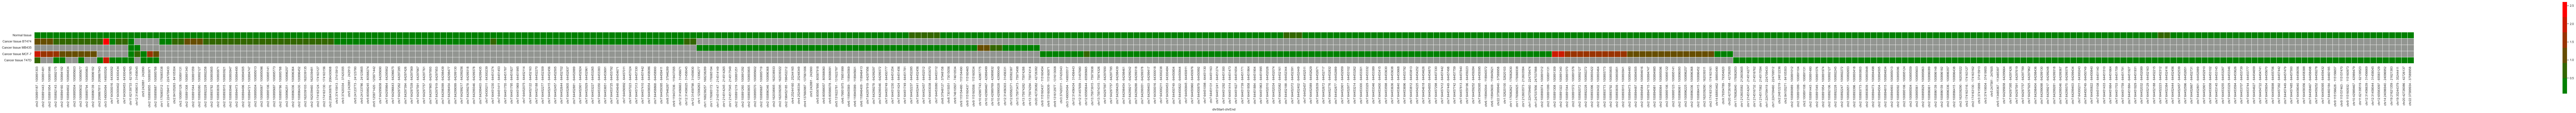

In [33]:
plot_heatmap(11, 'grey', sq = True, lw = 0.8)

Data Extraction and from different formats for finding overlaps and data filtering

In [8]:
for i,j,k,l,m,n in zip(data["chrom"], data["chromStart"], data["chromEnd"], data["chrom.1"], data["chromStart.1"], data["chromEnd.1"]):
    if i != l or j != m or k != n:
        print(i, l, '\n', j, m, '\n', k, n)
        break

In [ ]:
data1.info()
data1

In [33]:
#For new dataset
chromlist = []
beg = []
end = []
dval = []
for chro, bloc, eloc, dv in zip(data['chrom'], data['chromStart'], data['chromEnd'], data['dataValue']):
    chromlist.append(chro)
    beg.append(int(bloc))
    end.append(int(eloc))
    dval.append(float(dv))
    

# print(dval)
dataf = pd.DataFrame(data = {'Chromosome': chromlist, 'Begin Location': beg, 'End Location': end, 'data value': dval})
dataf.to_json(r'C:\Users\Master\Documents\CancerDetection-project\Filtered-HERVs-analysis-new-datasets\T47D.json', indent = 4)

In [43]:
chromlist = []
beg = []
end = []
for chro, bloc, eloc in zip(data['chrom'], data['chromStart'], data['chromEnd']):
        if (pd.isna(eloc) and pd.isna(bloc)):
            continue
        elif (pd.isna(bloc)):
            chromlist.append(chro)
            beg.append(int(eloc))
            end.append(int(eloc))
        elif (pd.isna(eloc)):
            chromlist.append(chro)
            beg.append(int(bloc))
            end.append(int(bloc))
        else:
            chromlist.append(chro)
            beg.append(int(bloc))
            end.append(int(eloc))

# print(chromlist['chr1'])
dataf = pd.DataFrame(data = {'Chromosome': chromlist, 'Begin Location': beg, 'End Location': end})
dataf.to_json(r'C:\Users\Master\Downloads\CancerDetection-project\HERVs-analysis-new/T47D.json', indent = 4)

In [8]:
chrom = []
bL = []
eL = []
for i in data["HERVs"]:
    split_chrom = i.split(":")
    split_chrom1 = split_chrom[0].split("_")
    split_loc = split_chrom[1].split("-")

    chrom.append(split_chrom1[0])
    bL.append(split_loc[0].replace(',', ''))
    eL.append(split_loc[1].replace(',', ''))
    


In [ ]:
dataf = pd.DataFrame(data = {'Chromosome': chrom, 'Begin Location': bL, 'End Location': eL})
dataf.to_json('coordinates of hervs(new).json', indent = 4)

In [7]:
chro = []
bL = []
eL = []
temp1 = ''
temp2 = ''

for i in data["genomic_dna_change"]:

    num = str(i).split(':')
    if ('_' in num[1]):
        sp = num[1].split('_')
        bLs = sp[0]
        eLs = sp[1]
        filteredB = list(filter(str.isdigit, bLs))
        filteredE = list(filter(str.isdigit, eLs))
        for n1, n2 in zip(filteredB, filteredE):
            temp1 += n1
            temp2 += n2

    elif ('-' in str(num[1])):
        sp = num[1].split('-')
        bLs = sp[0]
        eLs = sp[1]
        filteredB = list(filter(str.isdigit, bLs))
        filteredE = list(filter(str.isdigit, eLs))
        for n1, n2 in zip(filteredB, filteredE):
            temp1 += n1
            temp2 += n2
            
    else:
        filteredB = list(filter(str.isdigit, num[1]))
        filteredE = list(filter(str.isdigit, num[1]))
        for n1, n2 in zip(filteredB, filteredE):
            temp1 += n1
            temp2 += n2

    chro.append(str(num[0]))
    bL.append(int(temp1))
    eL.append(int(temp2))

    temp1 = ''
    temp2 = ''

dataf = pd.DataFrame(data = {'Chromosome': chro, 'Begin Location': bL, 'End Location': eL})
dataf.to_json('HPV mutation(new).json', indent = 4)


In [ ]:
for i, j, k, l in zip(bL, data['Begin Location'], eL, data['End Location']):
    if (i == j and k == l):
        print('true')
    else:
        print('failed here')
        break